In [1]:
import random 
import math
import scipy
import numpy as np
import matplotlib.pyplot as plt
import library_data_science as lds

# Distribution

Capture notion of relative frequency with which a random variable takes on centain values.

In [2]:
# Generated by ChatGPT
X = [
    16, 34, 95, 30, 40, 43, 18, 28, 37, 37, 50, 85, 92, 79, 38, 85, 37, 43, 70, 23,
    85, 51, 29, 85, 38, 90, 77, 46, 93, 77, 21, 71, 29, 20, 42, 90, 88, 29, 30, 33,
    17, 24, 33, 92, 15, 25, 30, 50, 91, 33, 82, 36, 93, 71, 72, 26, 91, 35, 92, 91,
    36, 90, 94, 87, 76, 91, 74, 91, 34, 22, 30, 91, 86, 91, 86, 54, 84, 21, 92, 73,
    37, 91, 30, 91, 83, 77, 41, 93, 90, 23, 40, 90, 95, 93, 72, 71, 32, 90, 32, 39
]

The best way to vizualize the distribution is the histogram.

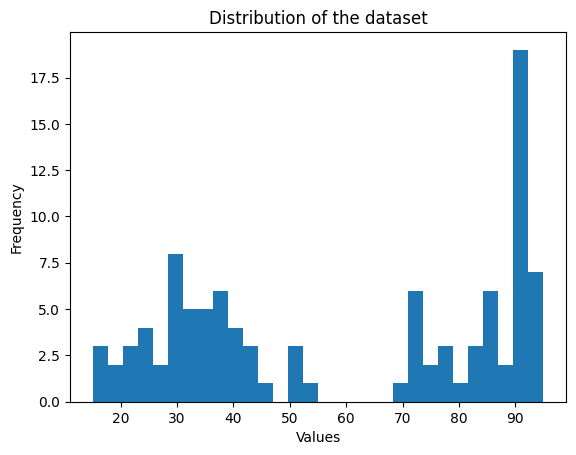

In [3]:
plt.hist(X, bins = 30)
plt.title('Distribution of the dataset')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Discrete Random Variables

**Discrete Random Variables** are a type of random variable that can take on a finite or countably infinite number of distinct values. These values are usually integers and correspond to specific events in a probability space.

For example:

* The outcome of rolling a standard six-sided die is a random variable X, which can take values $X=\{1,2,3,4,5,6\}$.
* If we flip a coin 10 times, the variable X, representing the number of heads, takes values $X=\{0, 1, 2, ..., 10\}$.

Probability for specific value must be in range $[0, 1]$. $$ 0 \leq \mathcal{P}(X[i]) \leq 1 $$

Moreover, the sum of all probabilities is always equal $1$. $$\sum_{i = 0}^{n-1}{\mathcal{P}(X[i])} = 1$$

### Probability Mass Function

Defines a distribution of probabilities for every possible value $X[i]$.

For example the distribution of probabilities for rolling a dice equals $\mathcal{P}(x) = \frac{1}{6} \text{ for } x \in X$.

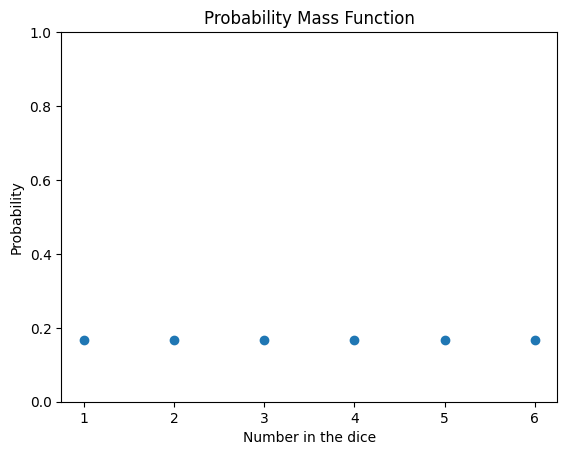

In [4]:
X = [1, 2, 3, 4, 5, 6]
Probability = [1 / 6] * 6

plt.scatter(X, Probability)
plt.xlabel('Number in the dice')
plt.ylabel('Probability')
plt.title('Probability Mass Function')
plt.ylim([0, 1])
plt.show()

Of course, it can take on more complex forms. $$X = \{20, 25, 50, 70, 75\} \quad \mathcal{P}(x) = \begin{cases} \frac{1}{8} \text{ for } x\in \{20, 25\}, \\ \frac{1}{4} \text{ for } x\in \{50, 75\}, \\ \frac{3}{8} \text{ for } x = 70 \end{cases}$$

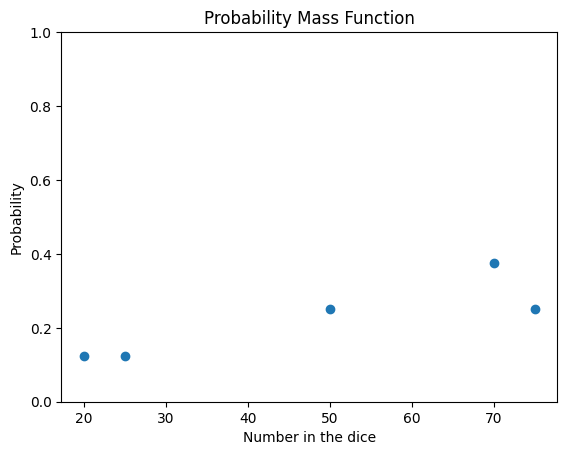

In [5]:
X = [20, 25, 50, 70, 75]
Probability = [1 / 8, 1 / 8, 1 / 4, 3 / 8, 1 / 4]

plt.scatter(X, Probability)
plt.xlabel('Number in the dice')
plt.ylabel('Probability')
plt.title('Probability Mass Function')
plt.ylim([0, 1])
plt.show()

If we would wanted to calculate the probability that $ \mathcal{P}( 23 \leq x \leq 71)$, the best way is to sum the probabilities. $$ \mathcal{P}( 23 \leq x \leq 71) = \mathcal{P}(x = 25) + \mathcal{P}(x = 50) + \mathcal{P}(x = 70) = \frac{1}{8} + \frac{1}{4} + \frac{3}{8} = \frac{3}{4} $$

It seems very simple because, in practice, it is. Additionally, it is very useful for analyzing events with a small number of possible scenarios, such as true/false, rolling a die, or playing roulette. However, in the vast majority of data analysis cases, we encounter data whose values are not limited by any specific range. For example, when examining the distance a jumper has leaped, we are unlikely to find two athletes who landed in exactly the same spot. In such cases, we are dealing with continuous random variables.

# Continuous Random Variables

**Continuous Random Variables** are a type of random variable that can take any value within a certain range (finite or infinite). In other words, their values belong to the set of real numbers and are not restricted to discrete points.

Examples of Continuous Random Variables:

* **Human height**: It can take any value within a specific range, e.g., $X = [150, 210]$.
* **Waiting time for a bus**: It can be any number of minutes or seconds.
* **Temperature**: Measured with precision to fractions of a degree, e.g., $21.3^{\circ}C$.

For continuous variables, the probability of any specific value is zero. $$\mathcal{P}(x \in X)=0$$

Much more often, the probability over a given interval is considered $\mathcal{P}(a \leq x \leq b)$, as we have mathematical methods to calculate it. Unlike discrete variables, we consider the probability density function, which is an approximate model representing the distribution of our data.

### Density Function

Let’s assume we are analyzing a finite set of continuous data containing 1000 results from some experiment. To simplify, probability density functions are used, which approximately describe the distribution of our data. Of course, there is some risk that the model we create will be insufficiently accurate. However, over many years of conducting experiments, scientists have developed numerous models describing various phenomena, where the accuracy is so good that the minimal model errors do not affect the quality of data analysis.

### Probability Density Function

We use the Probability Density Function (PDF), which describes how probability is distributed over a range. Note that the density can have a value greater than 1, but this should not be a concern. The probability of a value falling within an interval [a,b] is given by the following integral, which represents the area between the x-axis and the probability density function. $$\mathcal{P}(a \leq x \leq b) = \int_{a}^{b}{PDF(x)}dx$$ To calculate the density, each value should be multiplied by the weight represented as $\frac{1}{n}$. And of course for every probability density function, the full area between x-axis and the function is always equal $1$. $$\int_{-\infty}^{\infty}{PDF(x)}dx = 1$$

Below, I present the three most common distributions along with examples of where they occur.

**Uniform Distribution**

Input: $a = \text{start}, b = \text{end}$

* The outcome of rolling a fair six-sided die follows a uniform distribution because each of the six faces has an equal probability of showing up equal \
$\mathcal{P}(x) = \frac{1}{6}$.

* If you randomly select a card from a well-shuffled deck of 52 cards, each card has an equal chance of being selected, making it a uniform distribution equal $\mathcal{P}(x) = \frac{1}{52}$.

* Suppose you randomly select a time between 9:00 AM and 5:00 PM. The time is equally likely to be any moment within this 8-hour window, so the time follows a uniform distribution equal \
$\mathcal{P}(x) = \frac{1}{480}$.

Let’s assume that the data can take values from the interval $[a, b]$. $$PDF(x) =  \begin{cases} \displaystyle\frac{1}{b - a} \text{ for } a \leq x \leq b, \\ 0 \text{ otherwise } \end{cases}$$

In [6]:
def pdf_uniform(x: float, a: float, b: float) -> float:
    if a <= x <= b:
        return 1 / (b - a)
    else: 
        return 0

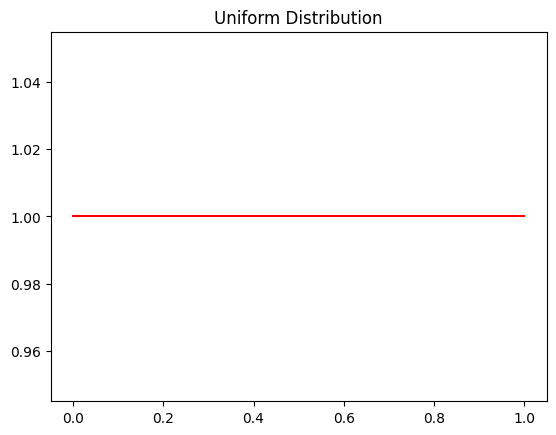

In [7]:
X = np.linspace(0, 1, num = 1000)
Y = [ pdf_uniform(x, 0, 1) for x in X ]

plt.plot(X, Y, color = 'red')
plt.title('Uniform Distribution')
plt.show()

To generate random dataset with uniform distribution, I can use `np.random.uniform(a, b, size)`.

In [8]:
a = 7
b = 36

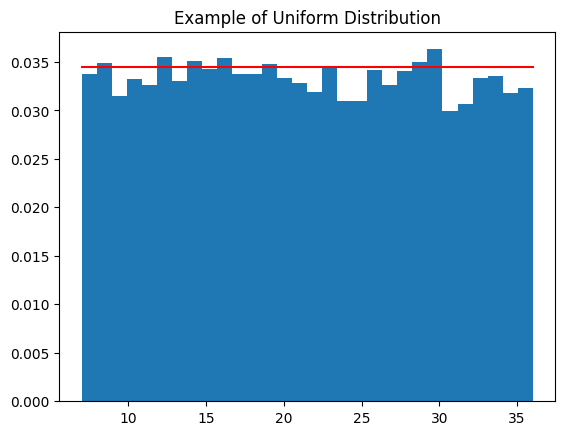

In [9]:
data = np.random.uniform(a, b, size = 10000)
weights = [ 1 / len(data) ] * len(data)

X = np.linspace(a, b, num = 1000)
Y = [ pdf_uniform(x, a, b) for x in X ]

plt.hist(data, bins = 30, weights = weights)
plt.plot(X, Y, color='red')
plt.title('Example of Uniform Distribution')
plt.show()

**Normal Distriibution**

Input: $Mean(x), Std(x)$

* The height of people in a given population typically follows a normal distribution, where most individuals' heights are near the average, with fewer people being significantly shorter or taller. Mean equals 170 and Std equals 10.

* IQ scores are often modeled by a normal distribution, with a mean of 100 and a standard deviation of 15. Most people score near the mean, with fewer people scoring significantly higher or lower. 

$$PDF(x) = \frac{1}{Std(x) \times \sqrt{2 \pi}} \times e^{-   \displaystyle\frac{\bigg[x - Mean(X) \bigg]^2}{ 2 \times \big(Std(x)\big)^2}}$$

In [10]:
def pdf_normal(x: float, mean: float, std: float) -> float:
    return ( 2.718281828459045 ** (- ((x - mean) ** 2) / (2 * (std ** 2)))) / ( std * ((2 * 3.141592653589793) ** 0.5) )

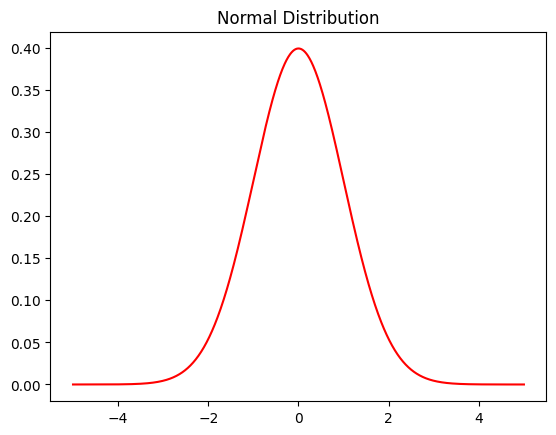

In [11]:
X = np.linspace(-5, 5, num = 1000)
Y = [ pdf_normal(x, 0, 1) for x in X ]

plt.plot(X, Y, color = 'red')
plt.title('Normal Distribution')
plt.show()

To generate random dataset with uniform distribution, I can use `np.random.normal(mean, std, size)`.

In [12]:
mean = 10
std = 3

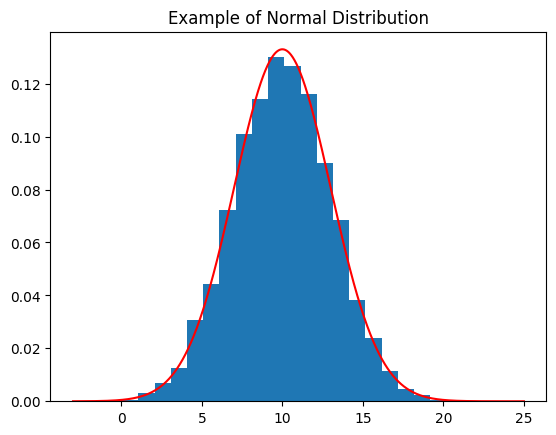

In [13]:
data = np.random.normal(mean, std, size = 10000)
weights = [ 1 / len(data) ] * len(data)

X = np.linspace(-3, 25, num = 1000)
Y = [ pdf_normal(x, mean, std) for x in X ]

plt.hist(data, bins = 23, weights = weights)
plt.plot(X, Y, color='red')
plt.title('Example of Normal Distribution')
plt.show()

**Exponential Distribution**

Input: $\lambda = \frac{1}{Mean(X)}$

* The time until a light bulb burns out follows an exponential distribution with a rate parameter $\lambda$, where $\lambda = \frac{1}{\text{mean lifetime}}$.

* In queuing theory, the exponential distribution models the time between arrivals of customers at a service point, such as a bank teller or a call center.

* The time until a radioactive atom decays is modeled by the exponential distribution, as the decay process occurs at a constant rate. For a radioactive substance with a decay rate $\lambda = 0.01$ per second, the time between decay events is exponentially distributed.

$$ PDF(x) = \lambda e^{-\lambda x} $$

In [14]:
def pdf_exponential(x: float, l: float) -> float:
    return l * (2.718281828459045 ** (-l * x))

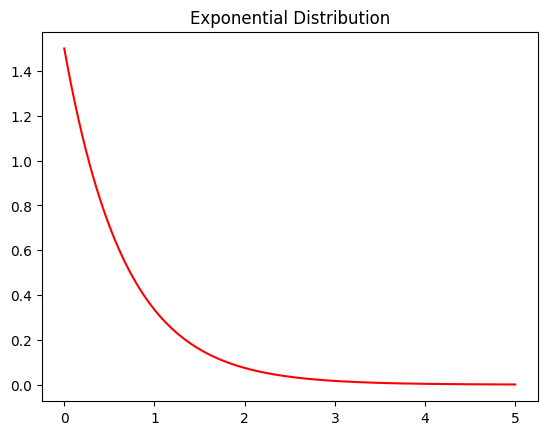

In [15]:
X = np.linspace(0, 5, num = 1000)
Y = [ pdf_exponential(x, 1.5) for x in X ]

plt.plot(X, Y, color = 'red')
plt.title('Exponential Distribution')
plt.show()

To generate random dataset with uniform distribution, I can use `np.random.exponential(mean, size)`.

**In this case, caution is required** because the Python function takes the mean as the first argument, not the $\lambda$ rate parameter. If you only have information about the value of $\lambda$, you should provide `1 / lambda`.

In [16]:
l = 1

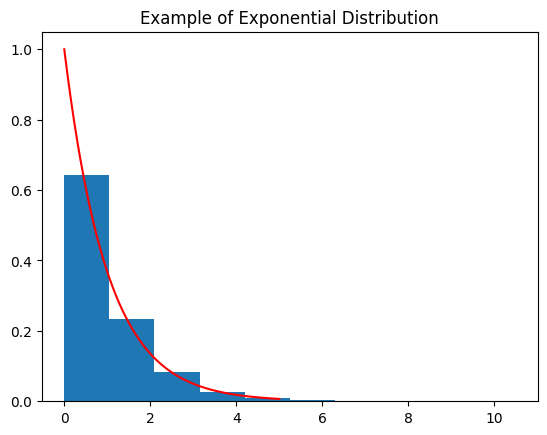

In [17]:
data = np.random.exponential(1 / l, size = 10000)
weights = [ 1 / len(data) ] * len(data)

X = np.linspace(0, 5, num = 1000)
Y = [ pdf_exponential(x, l) for x in X ]

plt.hist(data, weights = weights)
plt.plot(X, Y, color='red')
plt.title('Example of Exponential Distribution')
plt.show()

# Probability for given range of values

As I have written earlier $\mathcal{P}(a \leq x \leq b) = \displaystyle\int_{a}^{b}{PDF(x)}dx$.

For example I solved the probability for normally distributed data, where $Mean(X) = 7$ and $Std(X) = 1.3$ for $x\in [5.9, 6.8]$. \
Also I checked whether $\displaystyle\int_{-\infty}^{\infty}{PDF(x)}dx = 1$.

In [18]:
mean = 7
std = 1.3
prob = lambda x: pdf_normal(x, 7, 1.3)

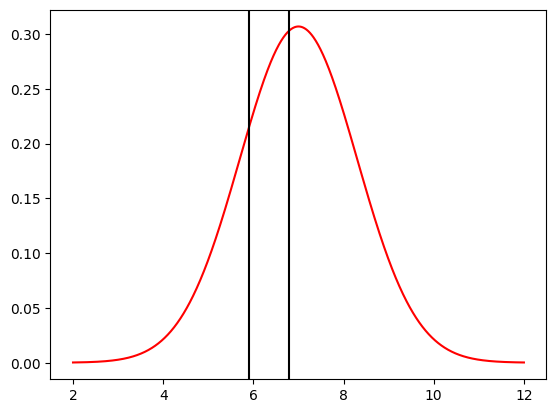

Probability on [5.9, 6.8]: 0.24015794803008553
Probability on all real numbers: 1.0000000000021663


In [19]:
data = np.random.normal(mean, std, size = 10000)

X = np.linspace(2, 12, num = 1000)
Y = [ pdf_normal(x, mean, std) for x in X ]

plt.plot(X, Y, color='red')
plt.axvline(5.9, color = 'black', zorder = 3)
plt.axvline(6.8, color = 'black', zorder = 3)
plt.show()

print('Probability on [5.9, 6.8]:', lds.integral(prob, 5.9, 6.8))
print('Probability on all real numbers:', lds.integral(prob, -100, 100))